Luke Gulson: [GitHub.io Link](https://lgulson12.github.io)

In [ ]:
import pandas as pd 
import numpy as np
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab_Notebooks/Final_Tutorial

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab_Notebooks/Final_Tutorial


In [ ]:
netflix_df = pd.read_csv(r'netflix_titles.csv') #import Netflix movies and shows data to a DF
hbo_max_df = pd.read_csv(r'hbo_max_titles.csv') #import Netflix movies and shows data to a DF
disneyp_df = pd.read_csv(r'disneyp_titles.csv') #import Netflix movies and shows data to a DF
amazonp_df = pd.read_csv(r'amazonp_titles.csv') #import Netflix movies and shows data to a DF
hulu_df = pd.read_csv(r'hulu_titles.csv') #import Netflix movies and shows data to a DF

# **Analysis of TV Shows as it Pertains to Attention Span**

By Luke Gulson

**Project Goals**

The goal of this project is to explore whether TV viewers have become more in favor of shorter and more quickly consumable content in recent years. People tend to associate the younger generations of today (Millenials/Gen Z) with shorter attention spans, and I decided I'd set out to see if data about television viewership supported this. I wanted to see specifically if there was any trends or correlation between runtimes of television shows, and the review scores they recieved.

# **Table 1 & 2**

The first table here will be based on five different datasets, all acquired from kaggle.com which contains data from over 20,000 different shows and movies available the top streaming services - Netflix, HBO Max, Disney+, Amazon Prime, Hulu - in the United States as of May - July 2022. Each of these unique titles contains a number of corresponding variables:

* id: The title ID on JustWatch.
* title: The name of the title.
* show_type: TV show or movie.
* description: A brief description.
* release_year: The release year.
* age_certification: The age certification.
* runtime: The length of the episode (SHOW) or movie.
* genres: A list of genres.
* production_countries: A list of countries that produced the title.
* seasons: Number of seasons if it's a SHOW.
* imdb_id: The title ID on IMDB.
* imdb_score: Score on IMDB.
* imdb_votes: Votes on IMDB.
* tmdb_popularity: Popularity on TMDB.
* tmdb_score: Score on TMDB.

For clarification, IMDB (Internet Movie DataBase) and TMDB (The Movie DataBase) are separate but very similar sites, differing slightly in that TMDB is completely powered by its community, unlike IMDB. For the purpose of gaining a broader understanding of the subject matter, I'll be analyzing movie rating scores from both of these sites seperately and together.

# **ETL (Extraction, Transformation, and Loading)**

In order to be able to actually compare these variables, I need to first manipulate the datasets a bit. With the final goal in mind being, one large DataFrame that contains all of the unique TV shows from all of these different steaming services.

In [ ]:
combined_df = netflix_df.merge(hbo_max_df, on = ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], how = 'outer')
combined_df = combined_df.merge(disneyp_df, on = ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], how = 'outer')
combined_df = combined_df.merge(amazonp_df, on = ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], how = 'outer')
combined_df = combined_df.merge(hulu_df, on = ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'], how = 'outer')


combined_df.drop_duplicates()
combined_df.head()
all_shows_df = combined_df[combined_df.type == 'SHOW']

Now, I've merged all of the databases from the streaming services together and made a new DataFrame containing only TV shows.

In [ ]:
all_shows_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

We can see here that the variables: runtime, seasons, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score are already in the table as either a int64 or float64 type. This is helpful because we can use this to represent these variables as numerical data in our visualizations.

**Table 2 - Runtime vs IMDB Scores**

Now we can do some work to display our representation of the relationship between runtime and IMDB scores.

In [76]:
votes_minimum = all_shows_df.imdb_votes.quantile(0.10)

This value is useful, as it informs us what is a basis for 'enought votes' to qualify as a legimate contribution to the data analysis.

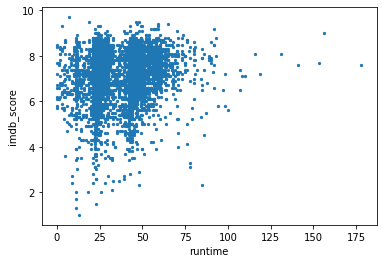

In [77]:
imdb_quantiled_df = all_shows_df[all_shows_df.imdb_votes > votes_minimum]
imdb_quantiled_df.plot.scatter(x = 'runtime', y= 'imdb_score', s = 5)

With this chart we can see a representation of the relationship that a show's runtime has with it's imdb score. At first glance, it appears that my claim's being countered by this data, giving an average of higher scores to shows with longer runtimes.

**Table 2 - Runtime vs TMDB Score**

Now we can start a similar process to find a visual representation of the relationship between TV show runtimes and their respective tmdb scores.

In [70]:
popularity_minimum = all_shows_df.tmdb_popularity.quantile(0.10)

While the variable tmdb_popularity represents a slightly different quantity from imdb_votes, it is still not a good idea to remove data from the dataset that represents less popular shows. The reviews on these shows could greatly skew the data in a way that would make it harder to reach an accurate conclusion.

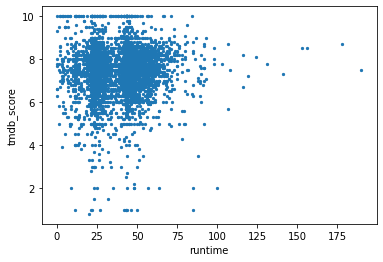

In [74]:
tmdb_quantiled_df = all_shows_df[all_shows_df.tmdb_popularity > popularity_minimum]
tmdb_quantiled_df.plot.scatter(x = 'runtime', y = 'tmdb_score', s = 5)

With this chart we can see a representation of the relationship that a show's runtime has with it's tmdb score. Viewing this chart, it appears that my claim's being countered by this data, showing little to no correlationship between any of the runtimes and their TMDB score.

# **Closing Thoughts and Goals Moving Forward**

Well, it appears as though I've really disproven my inital claim, so that leads me to believe I should either take my project in a totally different direction, or I should just analyze the counterpoint. Perhaps my Final Tutorial will be based on the fact that television viewership does not display any correlation with people wanting to consume bite-size content. Perhaps, I could collect other datasets that represent other kinds of digital media, like social media, or youtube videos to see if this claim could be observed elsewhere.

In [81]:
%%shell
jupyter nbconvert /content/drive/MyDrive/Colab_Notebooks/Final_Tutorial/Luke_Gulson_Milestone_1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Final_Tutorial/Luke_Gulson_Milestone_1.ipynb to html
[NbConvertApp] Writing 358302 bytes to /content/drive/MyDrive/Colab_Notebooks/Final_Tutorial/Luke_Gulson_Milestone_1.html
